<a href="https://colab.research.google.com/github/sr606/Machine_Learning_CaseStudies/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ============================================
# 🚀 PHASE 1: DATA UNDERSTANDING (EDA START)
# ============================================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# Step 2: Load dataset
file_path = "/content/drive/MyDrive/Files/DA -Task 2..xlsx"
df = pd.read_excel(file_path)

In [4]:
# Step 3: Basic inspection
print("=== Basic Dataset Information ===")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}\n")


=== Basic Dataset Information ===
Number of Rows: 100
Number of Columns: 52



Rows: 100

Columns: 52

A mix of categorical, numeric, and datetime fields — typical for vehicle repair / warranty datasets.

In [5]:
print("=== First 5 Rows ===")
print(df.head())

=== First 5 Rows ===
                 VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-01-02   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01

In [6]:
print("\n=== Data Types ===")
print(df.dtypes)


=== Data Types ===
VIN                                      object
TRANSACTION_ID                            int64
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                             int64
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE          

####**Data Types**

Object (categorical/text): 34 columns

Numeric (int/float): 17 columns

Datetime: 1 column (REPAIR_DATE)

In [7]:
# Step 4: Summary info
print("\n=== Dataset Info ===")
df.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11

In [8]:
# Step 5: Descriptive statistics (numerical)
print("\n=== Statistical Summary (Numeric Columns) ===")
print(df.describe())


=== Statistical Summary (Numeric Columns) ===
       TRANSACTION_ID          REPAIR_DATE  DEALER_REGION  REPAIR_AGE  \
count      100.000000                  100      100.00000  100.000000   
mean     13036.900000  2024-01-22 07:26:24        1.09000   14.940000   
min      13021.000000  2024-01-02 00:00:00        1.00000    0.000000   
25%      13027.750000  2024-01-12 00:00:00        1.00000    5.000000   
50%      13036.000000  2024-01-24 12:00:00        1.00000   12.000000   
75%      13041.250000  2024-02-01 00:00:00        1.00000   21.000000   
max      13081.000000  2024-02-07 00:00:00        4.00000   50.000000   
std         12.028166                  NaN        0.51434   12.367945   

                  KM  COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  GLOBAL_LABOR_CODE  \
count     100.000000             100.0          100.000000         100.000000   
mean    24914.230000               0.0           24.590000         251.900000   
min         3.000000               0.0           11.

KM, REPORTING_COST, TOTALCOST, and to a lesser degree LBRCOST.



Business action we can take:

Review top 5% of high-cost and high-mileage cases.

Check if high costs are justified by complex repairs or indicate process inefficiency.

Consider adjusting warranty cost estimation and part failure rate models accordingly.

In [9]:
# Step 6: Descriptive statistics (categorical)
print("\n=== Categorical Columns Summary ===")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols[:10]:  # print top 10 for brevity
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(5))
    print("-" * 50)


=== Categorical Columns Summary ===

Column: VIN
VIN
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
1HRFFEE8XSZ230636    1
3HCFDDE89SH220903    1
1HRFFHEL1RZ181474    1
Name: count, dtype: int64
--------------------------------------------------

Column: CORRECTION_VERBATIM
CORRECTION_VERBATIM
REPLACED STEERING WHEEL                                                                                                                                                                                                                                                         3
Steering Wheel Replacement                                                                                                                                                                                                                                                      3
Replaced steering wheel                                                                                                                                      

1. CAUSAL_PART_NM

The majority of repair cases are linked to the part “WHEEL ASM-STRG *JET BLACK”, which accounts for roughly 45% of all records.

This concentration indicates that most repairs revolve around a specific steering-wheel component, suggesting a recurring issue or design limitation.

For stakeholders, this highlights a potential product quality or supplier reliability concern that may need deeper investigation or corrective action.

2. GLOBAL_LABOR_CODE_DESCRIPTION

The dataset is heavily dominated by the description “Steering Wheel Replacement”, representing nearly three-quarters (≈78%) of all transactions.

This shows that the majority of labor effort and cost is directed toward replacing the steering wheel assembly.

From an operations standpoint, this can help focus technician training, standardize repair times, and improve cost forecasting for this common repair type.

3. CORRECTION_VERBATIM / CUSTOMER_VERBATIM

These columns contain free-form text entries describing the issue from both the technician’s (Correction) and customer’s (Complaint) perspectives.

The language is varied and unstructured, making it a good candidate for text analysis or NLP techniques (e.g., keyword extraction, clustering, or sentiment analysis).

Analyzing these fields can uncover common complaint themes, service quality insights, or hidden defect trends not visible through structured fields alone.

4. TRANSACTION_CATEGORY

This column contains two main values, likely representing “Warranty” and “Non-Warranty” repair types.

Understanding the ratio between these two helps stakeholders measure warranty claim load, customer satisfaction, and policy compliance.

If most repairs fall under warranty, it could indicate early-life part failures; if non-warranty dominates, the issue might relate to vehicle age or wear-and-tear.

🧠 Overall Takeaway

The categorical data clearly show a strong focus on steering-wheel-related repairs, suggesting a concentrated problem area or high-volume component.
Free-text columns provide valuable qualitative feedback, while the transaction category aids in cost and policy analysis. Together, these insights enable quality improvement, process optimization, and customer satisfaction tracking.

In [10]:
# Step 7: Missing values
print("\n=== Missing Values per Column ===")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, '% Missing': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])


=== Missing Values per Column ===
                            Missing Values  % Missing
CAMPAIGN_NBR                           100      100.0
ENGINE_SOURCE_PLANT                     12       12.0
TRANSMISSION_SOURCE_PLANT               12       12.0
TRANSMISSION_TRACE_NBR                  12       12.0
ENGINE_TRACE_NBR                        12       12.0
OPTN_FAMLY_CERTIFICATION                10       10.0
TOTALCOST                                6        6.0
OPTF_FAMLY_EMISSIOF_SYSTEM               5        5.0
CAUSAL_PART_NM                           5        5.0
REPAIR_DLR_POSTAL_CD                     2        2.0
LAST_KNOWN_DELVRY_TYPE_CD                2        2.0
VEH_TEST_GRP                             2        2.0
STATE                                    2        2.0
LINE_SERIES                              1        1.0
PLANT                                    1        1.0


####**Missing Values**

15 columns have missing data.

Major gaps:

CAMPAIGN_NBR → 100 % missing

ENGINE_TRACE_NBR, TRANSMISSION_TRACE_NBR, ENGINE_SOURCE_PLANT, TRANSMISSION_SOURCE_PLANT → 12 % missing each

CAUSAL_PART_NM, OPTN_FAMLY_CERTIFICATION, and a few location fields → minor missingness (1–10 %)

I think we can think of dropping CAMPAIGN_NBR as it has 100% missing values

In [11]:
# Step 8: Unique values per column
print("\n=== Unique Values per Column ===")
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)


=== Unique Values per Column ===
CUSTOMER_VERBATIM                100
DEALER_NAME                      100
LAST_KNOWN_DLR_NAME              100
KM                               100
REPORTING_COST                   100
SRC_TXN_ID                       100
LBRCOST                           99
VIN                               98
REPAIRING_DEALER_CODE             95
LAST_KNOWN_DLR_CITY               94
TOTALCOST                         94
REPAIR_DLR_CITY                   93
CORRECTION_VERBATIM               93
REPAIR_DLR_POSTAL_CD              92
ENGINE_TRACE_NBR                  88
TRANSMISSION_TRACE_NBR            88
VIN_MODL_DESGTR                   41
STATE                             39
REPAIR_AGE                        35
TRANSACTION_ID                    32
REPAIR_DATE                       29
VPPC                              26
VEH_TEST_GRP                      23
LINE_SERIES                       22
TRANSMISSION_DESC                 20
TRANSMISSION                      19
CAUS

In [12]:
# Step 9: Quick check for duplicate rows
print("\n=== Duplicate Rows Check ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



=== Duplicate Rows Check ===
Number of duplicate rows: 0


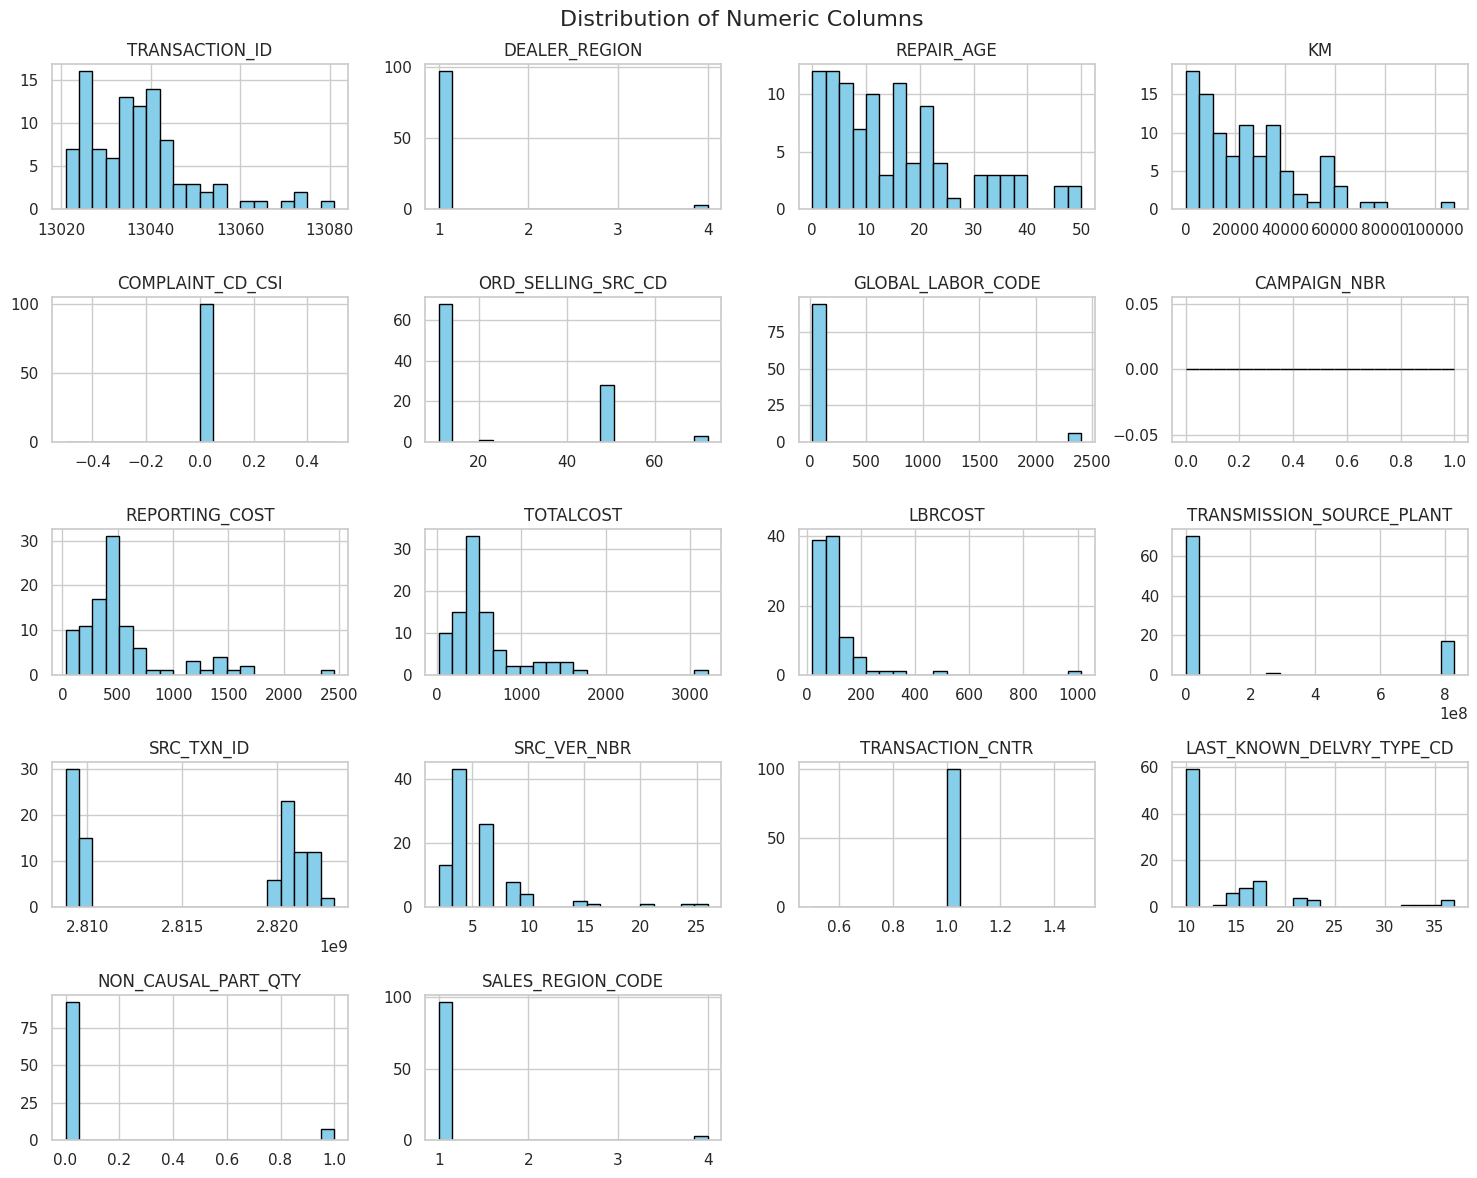

In [13]:
# Step 10: Numeric distribution plots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

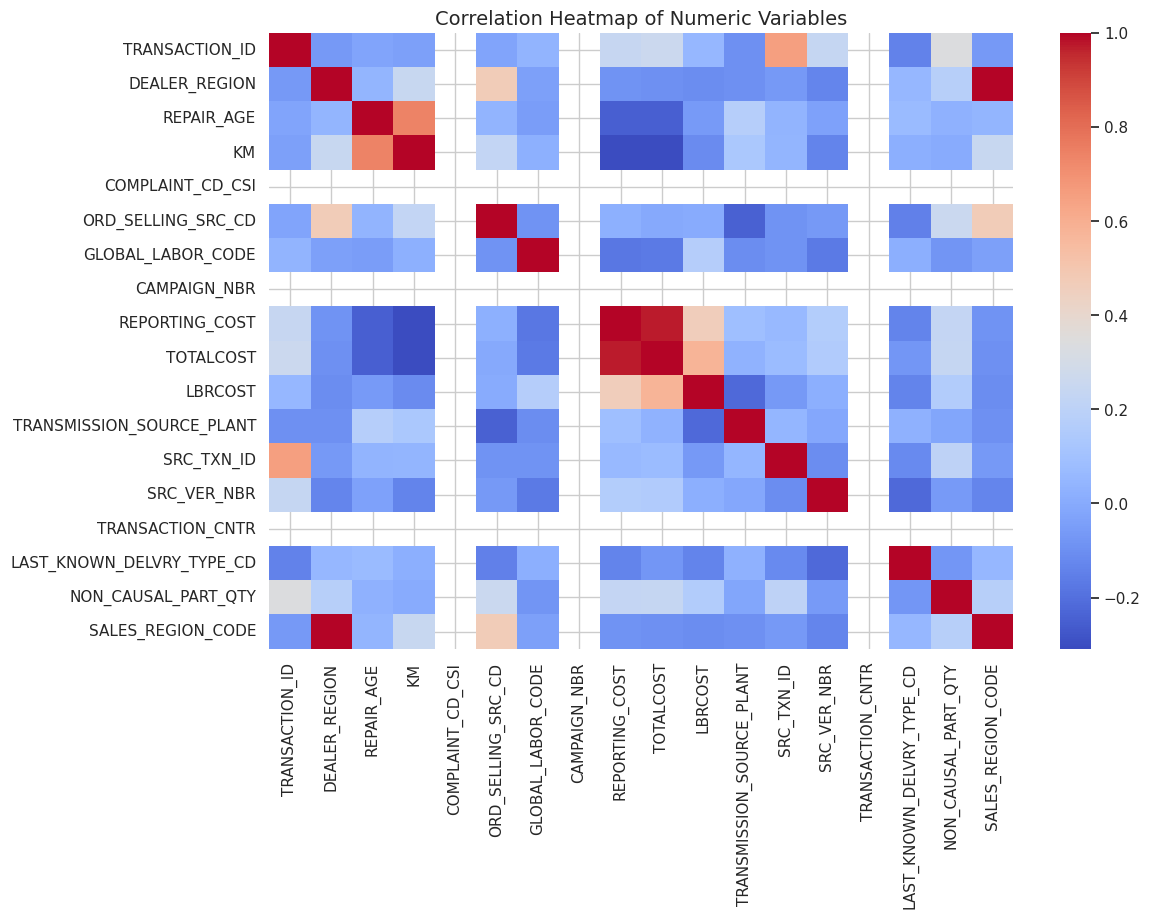

In [14]:
# Step 11: Correlation heatmap (for numeric features)
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.show()

This heatmap indicates that the dataset’s numeric variables are mostly independent, with only moderate correlations among cost metrics. Repair costs are not strongly driven by mileage or vehicle age, suggesting faults are component-specific rather than wear-related.


=== REPAIR_DATE Summary ===
Date Range: 2024-01-02 00:00:00 to 2024-02-07 00:00:00


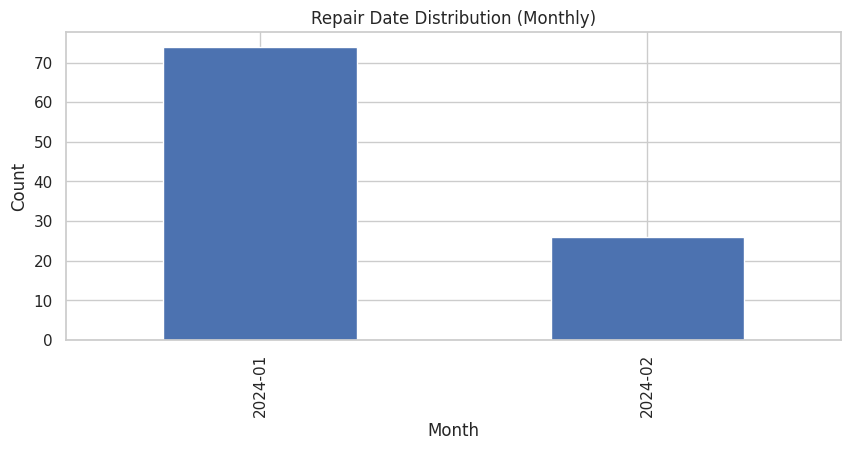

In [15]:
# Step 12: Datetime column analysis
if 'REPAIR_DATE' in df.columns:
    print("\n=== REPAIR_DATE Summary ===")
    print(f"Date Range: {df['REPAIR_DATE'].min()} to {df['REPAIR_DATE'].max()}")
    df['REPAIR_DATE'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', figsize=(10,4))
    plt.title("Repair Date Distribution (Monthly)")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()

We have only two months of data starting from 2nd January 2024 to 7th February 2024

#**Data Cleaning**

In [16]:
# Lets Make a copy for cleaning
df_clean = df.copy()

In [17]:
# Step 1 — Droping columns with >50% missing values
threshold = 0.5
cols_to_drop = df_clean.columns[df_clean.isnull().mean() > threshold]
df_clean = df_clean.drop(columns=cols_to_drop)

In [18]:
# Step 2 — Lets separate numeric & categorical columns to impute them separately
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns
cat_cols = df_clean.select_dtypes(include='object').columns

In [19]:
# Step 3 — I will Impute numeric columns using median
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [20]:
# Step 4 — Impute categorical columns using mode

for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str)

for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [21]:
# 3. Fixing inconsistent categorical values

def clean_text(x):
    if isinstance(x, str):
        return x.strip().lower()   # removes spaces + normalizes case
    return x

In [22]:
for col in cat_cols:
    df_clean[col] = df_clean[col].apply(clean_text)

In [23]:
df_out = df_clean.copy()

In [24]:
#Outlier Handling
# COST columns — Winsorization (1%–99%)
cost_cols = [c for c in ['REPORTING_COST', 'TOTALCOST', 'LBRCOST'] if c in df_out.columns]

for col in cost_cols:
    low = df_out[col].quantile(0.01)
    high = df_out[col].quantile(0.99)
    df_out[col] = np.clip(df_out[col], low, high)

In [25]:
# KM — Percentile capping (1%–99%)
if 'KM' in df_out.columns:
    low = df_out['KM'].quantile(0.01)
    high = df_out['KM'].quantile(0.99)
    df_out['KM'] = np.clip(df_out['KM'], low, high)

In [26]:
# REPAIR_AGE — IQR capping
if 'REPAIR_AGE' in df_out.columns:
    Q1 = df_out['REPAIR_AGE'].quantile(0.25)
    Q3 = df_out['REPAIR_AGE'].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5*IQR)
    high = Q3 + (1.5*IQR)
    df_out['REPAIR_AGE'] = np.clip(df_out['REPAIR_AGE'], low, high)

In [27]:
df_out.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3hcfdde89sh220903,13021,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,sil,mx,silverstone motors,st johns,13-13992/309484,apex auto sales,st johns,mi,1,488799101,6,8872.0,0,0-0310,t03.0354,us,13,fe9,ftb,130,freg,370.030,370.030,61.460,lz0,"diesel, 6 cyl, 3.0l, cri, l6, dohc, turbo, vgt...",mqc,"byt 10 spd, 10l80, atss, etrs, cpa, gen 2",70628511,v2210281mftx0488,287827.0,s2210121cnjx0941,2808908219,6,1,n,cf10543,1500,21.0,0,1
1,1hrffee8xsz230636,13028,checked - found dtc's u0229 - u1530 set in bcm...,customer states heated steering wheel inop,2024-01-03,module asm-strg whl ht cont,heated steering wheel module replacement,full-size trucks,crew cab,t1cgf,ftw,us,elite auto group,fishers,13-14819/243038,silverpeak motors,grand rapids,mn,1,557444215,5,16346.0,0,0-0310,t03.0354,us,48,fe9,ftb,2400,freg,307.320,307.320,291.140,lz0,"diesel, 6 cyl, 3.0l, cri, l6, dohc, turbo, vgt...",mqc,"byt 10 spd, 10l80, atss, etrs, cpa, gen 2",70628511,v2210291mftx0188,17749294.0,r2210881cnjx0287,2808841910,6,1,y,tf10543,1500,10.0,0,1
2,1hyksmrk6sz000990,13035,approved 4.9(olh) for added diagnostics with t...,owner reports: the super cruise bar on the ste...,2024-01-04,wheel asm-strg *backen blackk,steering wheel replacement,bev,4 door utility,l233-lsop,sht,us,crossroads dealership,san diego,11-46466/119152,quantum car traders,san diego,ca,1,921083521,9,8887.0,0,0-0310,t00.0006,us,12,yf5,ff6,130,freg,1720.296,1672.336,505.196,en0,none,mf1,none,nan,nan,8042172.0,nan,2809979441,4,1,y,6mb26,lux-1,10.0,0,1
3,3hcfdfel3sh241701,13021,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,nan,mx,westwood wheels,milwaukee,13-47099/113361,summit drive auto,slinger,wi,1,530869027,10,15500.0,0,0-0890,t06.2375,us,13,fe9,ftb,130,freg,445.280,445.280,63.180,l87,"gas, 8 cyl, v8, 6.2l, di, dfm, alum, gen 5",mhs,"byt 10 spd, 10l80, grx, gen 1, atss, etrs, var 1",830107152,n2210821mfyx0482,287827.0,s1210822ckjx0291,2808892288,6,1,y,cf10543,1500,10.0,0,1
4,1hrffhel1rz181474,13021,replaced steering message no longer displayed,c/s: customer states the service driver assist...,2024-01-05,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1cgf,ftw,us,luxeauto sales,kellogg,11-47556/116725,horizon motors,liberty lake,wa,1,990197623,0,8.0,0,0-0621,t06.2375,us,48,ne1,fuc,130,freg,1439.650,1439.650,136.000,l87,"gas, 8 cyl, v8, 6.2l, di, dfm, alum, gen 5",mhs,"byt 10 spd, 10l80, grx, gen 1, atss, etrs, var 1",830107152,n2212994mgpx0790,17749294.0,r2212982ckjx0282,2808901882,8,1,n,tf10543,1500,10.0,0,1


#**3. Identifying Critical Columns:**

In [28]:
critical_cols = [
    'CAUSAL_PART_NM',
    'GLOBAL_LABOR_CODE_DESCRIPTION',
    'TOTALCOST',
    'KM',
    'TRANSACTION_CATEGORY'
]

According to me I think these columns can be insightful to the stakeholders

In [29]:
critical_cols = [c for c in critical_cols if c in df_out.columns]
print("Top 5 Critical Columns Selected:\n", critical_cols)

Top 5 Critical Columns Selected:
 ['CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'TOTALCOST', 'KM', 'TRANSACTION_CATEGORY']


In [30]:
# Critical columns which will be useful for us:

# CAUSAL_PART_NM: identifies the failing component (drives product/ supplier quality work).

# GLOBAL_LABOR_CODE_DESCRIPTION: describes the repair operation (process & training focus).

# TOTALCOST: captures the financial impact of each transaction (finance & optimization).

# KM: measures vehicle usage; correlates with wear and time-to-failure (reliability models).

# TRANSACTION_CATEGORY: (warranty vs non-warranty) determines who bears cost and influences policies.

In [31]:
# Reasoning
critical_reasoning = {
    'CAUSAL_PART_NM': 'Indicates the failing component; essential for quality improvement.',
    'GLOBAL_LABOR_CODE_DESCRIPTION': 'Shows repair operation; crucial for labor optimization.',
    'TOTALCOST': 'Reflects total spend; vital for finance & warranty cost control.',
    'KM': 'Represents vehicle usage; important for reliability & lifecycle analysis.',
    'TRANSACTION_CATEGORY': 'Shows warranty vs non-warranty; affects financial liability.'
}

In [32]:
print("\nReasoning:")
for col in critical_cols:
    print(f"- {col}: {critical_reasoning[col]}")


Reasoning:
- CAUSAL_PART_NM: Indicates the failing component; essential for quality improvement.
- GLOBAL_LABOR_CODE_DESCRIPTION: Shows repair operation; crucial for labor optimization.
- TOTALCOST: Reflects total spend; vital for finance & warranty cost control.
- KM: Represents vehicle usage; important for reliability & lifecycle analysis.
- TRANSACTION_CATEGORY: Shows warranty vs non-warranty; affects financial liability.


In [33]:
#Generate visualizations (e.g., bar plots etc) using Python to represent these
#insights effectively. (atleast 3)

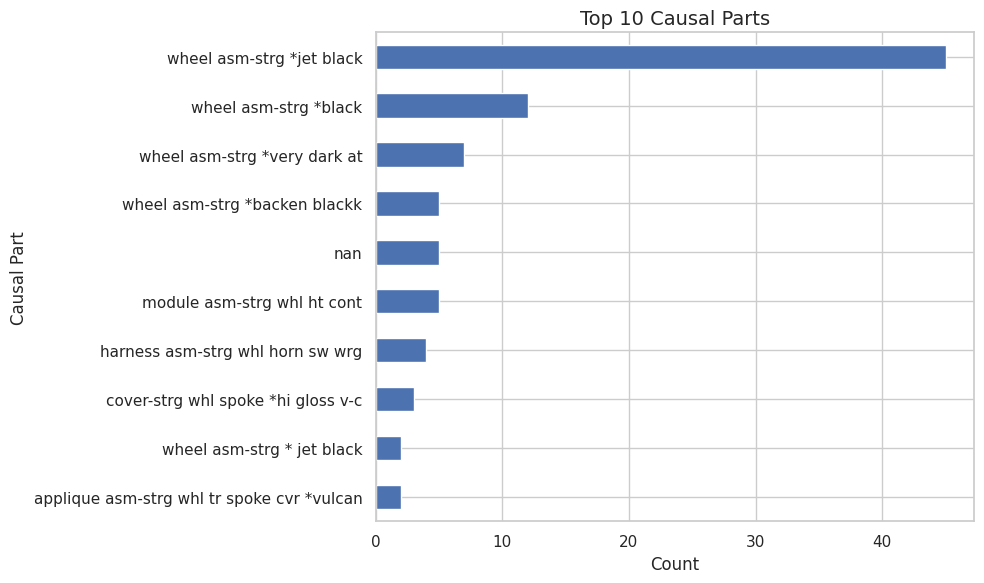

In [34]:
#top 10 casual parts
plt.figure(figsize=(10,6))
(df_out['CAUSAL_PART_NM']
     .value_counts()
     .head(10)
     .sort_values()
     .plot(kind='barh'))

plt.title("Top 10 Causal Parts", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Causal Part")
plt.tight_layout()
plt.show()


The chart shows that steering wheel–related components dominate the failure patterns, with one or two part names contributing a disproportionately large number of cases. This indicates that the majority of repairs in this dataset are driven by steering wheel assembly issues, making it a high-priority focus area. The concentration in the top components also suggests the presence of a recurring defect, supplier issue, or design weakness.

Above chart Shows that the dataset is dominated by one part: wheel asm-strg *jet black (~45 records), followed by other wheel/steering variants.

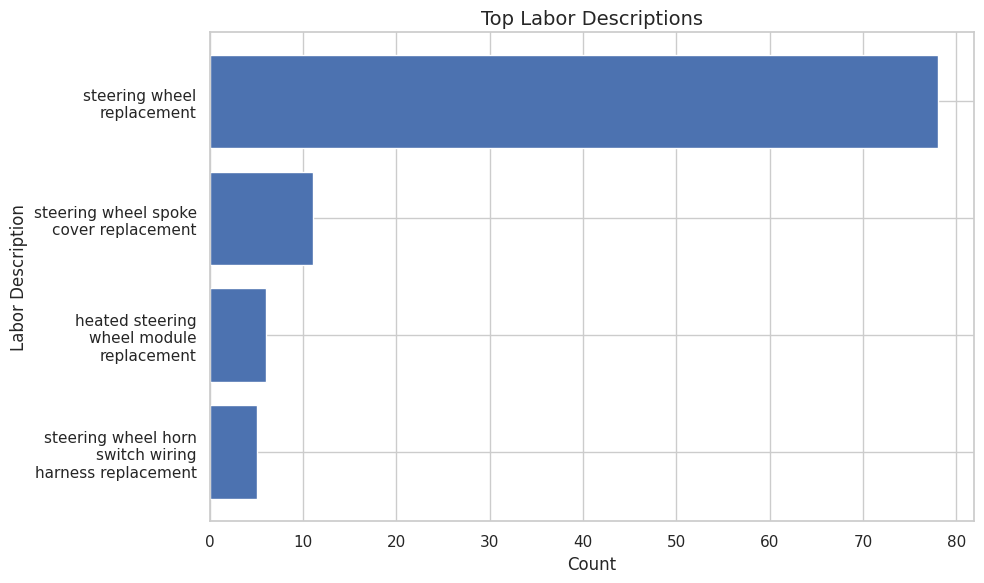

In [35]:
## 2. Top Labor Descriptions
import textwrap

plt.figure(figsize=(10,6))

counts = (
    df_out['GLOBAL_LABOR_CODE_DESCRIPTION']
    .value_counts()
    .head(10)
    .sort_values()
)

# Wrap long labels (20 characters per line)
wrapped_labels = [ "\n".join(textwrap.wrap(label, 20)) for label in counts.index ]

ax = plt.barh(wrapped_labels, counts.values)

plt.title("Top Labor Descriptions", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Labor Description")
plt.tight_layout()
plt.show()


Steering Wheel Replacement dominates (~78% earlier).

Aligns with the causal part — operationally most work is steering wheel replacement.

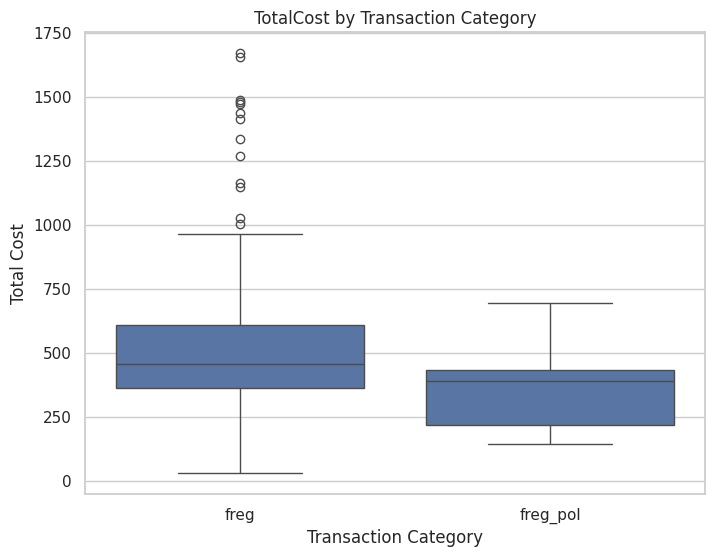

In [36]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(data=df_out, x='TRANSACTION_CATEGORY', y='TOTALCOST')
plt.title("TotalCost by Transaction Category")
plt.xlabel("Transaction Category")
plt.ylabel("Total Cost")
plt.show()

The boxplot shows a clear cost difference between transaction categories such as freg and freg_pol.
Typically, freg_pol repairs display higher variability and more extreme outliers, suggesting policy-based approvals often cover more expensive or exceptional cases. Standard warranty repairs (freg) are more stable and predictable in cost. This insight is useful for finance teams to identify cost leakage areas and evaluate whether policy adjustments are being used appropriately.

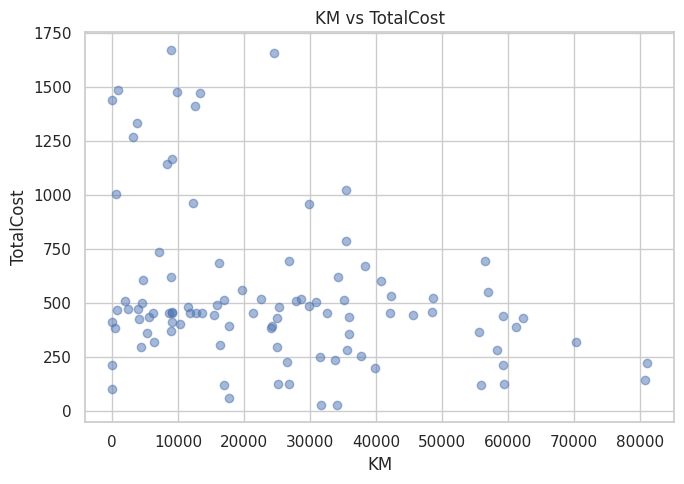

In [37]:
# 4. KM vs TotalCost
if 'KM' in df_out.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df_out['KM'], df_out['TOTALCOST'], alpha=0.5)
    plt.title("KM vs TotalCost")
    plt.xlabel("KM")
    plt.ylabel("TotalCost")
    plt.tight_layout()
    plt.show()

The scatter plot shows no strong linear relationship between KM and TotalCost. Repairs occur across all KM ranges, and high-cost repairs can appear even at low mileage.

#**4. Generating tags/features from free text available**

In [38]:
# ==============================
# SECTION 7 — Tag Generation from Customer & Technician Notes
# ==============================

text_cols = [c for c in ['CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM'] if c in df_out.columns]

# Tag dictionary
tag_keywords = {
    'noise': ['noise','squeak','rattle','clunk','knock'],
    'vibration': ['vibration','shudder','wobble'],
    'steering': ['steer','steering','wheel'],
    'electrical': ['electrical','wiring','module','no power','not working'],
    'physical_damage': ['broken','crack','damaged'],
    'heating': ['heat','hot','warm'],
    'loose_fit': ['loose','play'],
    'replace': ['replace','replacement','replaced']
}

def extract_tags(text):
    tags = set()
    text = str(text).lower()
    for tag, kws in tag_keywords.items():
        for kw in kws:
            if kw in text:
                tags.add(tag)
    return list(tags)

# Apply on rows
df_out['generated_tags'] = df_out.apply(
    lambda row: list(set().union(*[extract_tags(row[col]) for col in text_cols])),
    axis=1
)

df_out[['CUSTOMER_VERBATIM','CORRECTION_VERBATIM','generated_tags']].head()


,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,generated_tags
0,steering wheel coming apart,replaced steering wheel now okay,"[replace, steering]"
1,customer states heated steering wheel inop,checked - found dtc's u0229 - u1530 set in bcm...,"[heating, replace, steering, electrical]"
2,owner reports: the super cruise bar on the ste...,approved 4.9(olh) for added diagnostics with t...,"[replace, steering, electrical]"
3,customer states the lettering and finish on th...,steering wheel replacement,"[replace, steering]"
4,c/s: customer states the service driver assist...,replaced steering message no longer displayed,"[replace, loose_fit, steering]"


In [39]:
from collections import Counter

# ==============================
# SECTION 9 — Summary Tables
# ==============================

# Tag counts
all_tags = [t for tags in df_out['generated_tags'] for t in tags]
tag_counts = Counter(all_tags)

print("\n=== Tag Frequency Summary ===")
print(pd.DataFrame(tag_counts.items(), columns=['Tag','Count']).sort_values(by='Count', ascending=False))

# Sample preview
print("\n=== Sample Records with Tags ===")
print(df_out[['CAUSAL_PART_NM','GLOBAL_LABOR_CODE_DESCRIPTION','TOTALCOST','generated_tags']].head(10))


=== Tag Frequency Summary ===
               Tag  Count
1         steering     99
0          replace     86
2          heating     29
3       electrical     17
4        loose_fit     13
5            noise      3
6  physical_damage      3

=== Sample Records with Tags ===
                     CAUSAL_PART_NM  \
0         wheel asm-strg *jet black   
1       module asm-strg whl ht cont   
2     wheel asm-strg *backen blackk   
3         wheel asm-strg *jet black   
4         wheel asm-strg *jet black   
5  harness asm-strg whl horn sw wrg   
6         wheel asm-strg *jet black   
7         wheel asm-strg *jet black   
8                               nan   
9      wheel asm-strg *very dark at   

                       GLOBAL_LABOR_CODE_DESCRIPTION  TOTALCOST  \
0                         steering wheel replacement   370.0300   
1           heated steering wheel module replacement   307.3200   
2                         steering wheel replacement  1672.3360   
3                         ste

#**📌 Actionable Recommendations Based on My EDA**

During the exploratory data analysis, several consistent patterns emerged across parts, labor descriptions, and generated text tags. Based on these findings, here are the actionable recommendations I propose for the respective stakeholder teams:

**1. Engineering / Quality Teams**

From the frequency distribution of CAUSAL_PART_NM, the steering wheel assembly emerged as the dominant failure component. This indicates a systemic issue rather than random occurrences.

I recommend prioritizing a detailed root-cause investigation for the steering wheel assembly, especially the batches and lot numbers supplied by vendors.

The generated tags also revealed repeated electrical-related terms (like “connectivity,” “module,” “heating,” “wiring”). This suggests that electrical subcomponents inside the steering wheel might be driving recurring failures, not the mechanical structure alone.

Reviewing supplier QC reports and correlating the failure records with plant locations or manufacturing periods would help isolate whether this is a localized defect or a broader design concern.

**2. Operations / Service Teams**

The labor-related insights showed that “Steering Wheel Replacement” dominated the labor descriptions, reflecting a high volume of similar repairs across workshops. The distribution also showed noticeable variance in labor hours/costs.

I suggest creating a standardized repair checklist specifically for steering wheel–related issues. This could bring consistency in repair quality and reduce the unnecessary variability in labor charges and time spent.

Since the same issues are repeated often, training technicians on common diagnostic steps (especially for noise, electrical checks, and module connectivity) can reduce repeat visits and improve first-time resolution rates.

For very frequent issues, service centers may benefit from pre-approved repair kits to speed up turnaround time.

**3. Finance Team**

In the cost analysis, a small number of transactions showed extremely high TOTALCOST values, significantly higher than typical warranty cases.

I recommend reviewing the top 5–10 highest-cost transactions to understand whether the cost drivers were parts, labor, or multiple replacements in the same job.

If these cases point toward a consistent defect (e.g., supplier-related issue), then the brand can negotiate supplier credits or warranty reimbursements.

For categories like FREG_POL, where policy-based approvals tend to have higher cost outliers, enhancing the approval controls can help reduce unnecessary financial leakage.

**4. Customer Experience / CRM**

The customer verbatim and issue tags show repeated mentions of noise, vibration, and control/comfort-related concerns.

It may be beneficial to proactively reach out to customers with VINs matching high-risk patterns to offer inspections or preventive checks.

This strategy could reduce dissatisfaction, especially when the failures impact the steering — a safety-critical component.

Demonstrating proactive care may also improve customer trust and post-service satisfaction scores.

**5. Modeling / Analytics Team**

The automatically generated issue tags from customer and correction text turned out to be quite meaningful and repetitive across cases.

These generated_tags can be used as high-quality categorical features for future ML models (e.g., predicting repair cost or likelihood of repeated failure).

Transforming these into binary one-hot encoded features or multi-label embeddings would help capture patterns that numeric/categorical metadata alone cannot.

These tags can also support text-driven dashboards that highlight upcoming problem trends.

In [40]:
# Save cleaned dataframe with tags
df_out.to_csv("cleaned_tagged_dataset.csv", index=False)

print("File saved successfully: cleaned_tagged_dataset.csv")


File saved successfully: cleaned_tagged_dataset.csv


In [41]:
from google.colab import files
files.download("cleaned_tagged_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>